# Analysis of ABCtoolbox results of updated chromosomes

ABCtoolbox output includes:  
- retained simulations
- marginal posterior densities
- marginal posterior densities charecterisitcs
- joint posterior densities

In this Notebook, I:
- reformat the marginal posterior densities charecterisitcs file so it is easily readable
- plot a heatmap of the joint posterior densities
- calculate the probability NEA > NWA
- plot the marginal priors, truncated priors, and posterior denstities

## Setup code


In [1]:
import sys, os
sys.path.append('/vol_c/src/ABC_results_AJ/')
print(sys.executable)
print(sys.version)
print(sys.version_info)
print(sys.path)

os.chdir('/vol_c/ABC_AJmodels_update')

/opt/anaconda3/bin/python
3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)
['', '/opt/anaconda3/lib/python36.zip', '/opt/anaconda3/lib/python3.6', '/opt/anaconda3/lib/python3.6/lib-dynload', '/opt/anaconda3/lib/python3.6/site-packages', '/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/home/agladstein/.ipython', '/vol_c/src/ABC_results_AJ/']


In [2]:
from sys import argv
import pandas as pd
# from ggplot import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True, style="ticks")
import numpy as np
# import rpy2
# %load_ext rpy2.ipython

from functions.assessment_functions import *

/opt/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/opt/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/opt/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Chr2

## Create PCA and density plots of summary statistics


In [9]:
%%bash
if [ -e "/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2_pca.pdf" ]; then
    echo "File exists"
else 
    head -1 /vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2.txt >/vol_c/ABC_AJmodels_update/header_M2.txt
    Rscript /vol_c/src/macsswig_simsaj/dist_plot_stats.R /vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2.txt /vol_c/ABC_data/chr2/real_output_M23_IBD.summary /vol_c/ABC_AJmodels_update/header_M2.txt
fi 

[1] "/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2.txt"
[2] "/vol_c/ABC_data/chr2/real_output_M23_IBD.summary"          
[3] "/vol_c/ABC_AJmodels_update/header_M2.txt"                  
[1] "/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2_params.pdf"
[1] "/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2_stats.pdf"
[1] "/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2_pca.pdf"
null device 
          1 
null device 
          1 
null device 
          1 


Read 204 items


In [11]:
%%bash
ls /vol_c/ABC_AJmodels_update/*pdf

/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2_params.pdf
/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2_pca.pdf
/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr2_stats.pdf
/vol_c/ABC_AJmodels_update/RMSE_input_ABC_OSG_CHTC_HPC_chr2.txt.pdf


## PLS Reduced Params

### Model 2


In [12]:
path = '/vol_c/ABC_AJmodels_update'
os.chdir(path)
abc_config_name = "test_ABC_estimate_PLS.txt"

[simName, obsName, outputPrefix, params_str] = read_abc_config(abc_config_name)
print(simName)

[BestSimsParamStats_name,
 MarginalPosteriorDensities_name,
 MarginalPosteriorCharacteristics_name,
 jointPosterior_name,
 MarginalPosteriorCharacteristics_reformat_name,
modelFit] = get_results_files(outputPrefix)
jointPosterior_name = '{}model0_jointPosterior_1_2_Obs0.txt'.format(outputPrefix)
print(BestSimsParamStats_name)
print(MarginalPosteriorDensities_name)
print(jointPosterior_name)
print(MarginalPosteriorCharacteristics_reformat_name)

test_ABC_estimate_PLS.txt
input_ABC_OSG_CHTC_HPC_chr2_transformed_10pls.txt
ABC_M2_genome_estimate_162752_10pls_1000ret_chr2_model0_BestSimsParamStats_Obs0.txt
ABC_M2_genome_estimate_162752_10pls_1000ret_chr2_model0_MarginalPosteriorDensities_Obs0.txt
ABC_M2_genome_estimate_162752_10pls_1000ret_chr2_model0_jointPosterior_1_2_Obs0.txt
ABC_M2_genome_estimate_162752_10pls_1000ret_chr2_model0_MarginalPosteriorCharacteristicsReformat.txt


In [13]:
params_str
ranges = params_str.split(',')
print(ranges)
param_indexes = []
for values in ranges:
    if '-' in values:
        x = int(values.split('-')[0].strip()) - 1
        y = int(values.split('-')[1].strip())
        param_indexes.extend(list(range(x, y)))
    else:
        param_indexes.append(int(values) -1 )
print(param_indexes)

['2-12']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


#### Reformat marginal posterior densities charecterisitcs file

In [15]:
df_chrs_reformat_pls = reformat_Characteristics(MarginalPosteriorCharacteristics_name)
df_chrs_reformat_pls

parsing ABC_M2_genome_estimate_162752_10pls_1000ret_chr2_model0_MarginalPosteriorCharacteristics.txt


/vol_c/src/ABC_results_AJ/functions/assessment_functions.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_param['param'] = param


,mode,mean,median,q50_lower,q50_upper,q90_lower,q90_upper,q95_lower,q95_upper,q99_lower,q99_upper,HDI50_lower,HDI50_upper,HDI90_lower,HDI90_upper,HDI95_lower,HDI95_upper,HDI99_lower,HDI99_upper,param
0,3.822220,4.725740,4.695120,3.898990,5.520330,3.248450,6.332100,3.137730,6.487940,3.03087,6.649450,3.504540,5.096100,3.130810,6.194130,3.052490,6.382310,3.000000e+00,6.604030,Log10_NWA
0,5.854550,5.367860,5.369410,4.777700,5.961640,4.234510,6.488520,4.133850,6.581080,4.03132,6.672810,4.820760,6.004550,4.259090,6.512400,4.158390,6.604550,4.046520e+00,6.686360,Log10_NEA
0,3.264340,3.287420,3.282490,3.026370,3.543120,2.663830,3.927730,2.547280,4.054710,2.32524,4.308900,3.015990,3.532300,2.654750,3.917030,2.547150,4.054550,2.298460e+00,4.280330,Log10_NAg
0,5.242420,5.086530,5.126900,4.731810,5.484840,4.164940,5.846900,3.987320,5.914770,3.66196,5.980720,4.863640,5.603550,4.348480,5.971130,4.142880,5.984850,3.789270e+00,6.000000,Log10_NJ
0,5.060610,4.967030,4.999310,4.603640,5.367450,4.032500,5.778570,3.851340,5.868120,3.50507,5.967480,4.682160,5.439390,4.147100,5.863640,4.015150,5.979230,3.642790e+00,6.000000,Log10_NM
0,0.232324,0.459608,0.447398,0.241071,0.671009,0.067459,0.891533,0.037424,0.935852,0.00839,0.984091,0.126263,0.544296,0.035354,0.853202,0.005051,0.896163,8.852980e-07,0.970289,m
0,513.131000,615.908000,580.528000,495.880000,703.827000,423.694000,941.733000,412.481000,1013.420000,402.63000,1126.010000,428.283000,604.405000,400.000000,851.395000,400.000000,941.733000,4.000000e+02,1085.840000,TEM
0,32.121200,28.728500,29.015400,25.357100,32.215500,21.716300,34.928600,21.009300,35.407200,20.24980,35.867700,27.588300,34.141400,22.343400,35.448500,21.640300,35.919200,2.046640e+01,36.000000,TA
0,291.432000,322.037000,311.203000,201.695000,427.962000,79.165400,608.409000,54.045000,673.698000,28.65500,813.742000,180.335000,405.013000,43.478400,556.455000,21.000000,608.409000,2.100000e+01,755.492000,TMJ
0,13.959600,14.565200,14.312600,9.275610,19.520800,4.117930,26.157200,3.178190,28.081800,2.26473,31.412400,8.626260,18.842600,2.809510,24.464600,2.000000,26.157200,2.000000e+00,30.161600,TAEW


In [16]:
prior_pls = pd.read_csv(simName, sep = '\t')
prior_pls.head()

,daf,Log10_NWA,Log10_NEA,Log10_NAg,Log10_NJ,Log10_NM,m,TEM,TA,TMJ,...,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9,LinearCombination_10
0,0.071847,5.91514,5.82727,3.97635,5.45455,4.81818,0.303031,553.535,25.9798,342.273,...,1.29954,2.982710,-2.396540,-1.43707,-0.006138,2.30511,2.640410,1.869780,-0.385853,1.92512
1,0.065505,5.01818,5.47273,4.25871,5.00000,4.45456,0.262627,408.081,23.2323,258.980,...,6.87122,-2.159700,-2.444110,-3.95087,0.887258,2.34338,1.345120,2.177460,0.365694,-1.06597
2,0.058566,3.14953,5.85455,2.94101,4.69697,5.84848,0.484849,545.455,26.9495,354.172,...,-1.57939,-7.375700,0.649620,1.90260,1.721050,1.64795,2.906750,2.674740,-0.007065,1.49132
3,0.084823,4.04646,6.12727,3.27045,4.87879,3.84850,0.696970,707.071,23.5556,282.778,...,3.45996,0.176021,-0.386571,1.03542,0.570375,1.36536,-0.849521,1.388570,-1.833470,2.43083
4,0.074205,4.15857,5.93636,3.92932,5.96970,5.63636,0.505051,424.242,23.8788,235.182,...,5.53624,0.384806,-3.146940,1.01576,0.581075,-2.16016,-0.092262,0.436462,-1.799490,1.42754


In [17]:
# param_indexes = get_param_indexes(params_str)
print(param_indexes)
params = get_col_names(param_indexes, prior_pls)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [18]:
truncated_pls = pd.read_csv(BestSimsParamStats_name, sep = '\t')
truncated_pls.head()

,Sim_num,Dist,Log10_NWA,Log10_NEA,Log10_NAg,Log10_NJ,Log10_NM,m,TEM,TA,...,LinearCombination_0,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9
0,309,23.8375,4.19595,5.80000,3.27045,4.93939,5.39394,0.565657,585.859,29.6970,...,12.07730,2.702330,2.770530,0.111615,4.57513,2.69498,-3.425050,-1.838840,-0.521338,-4.057980
1,1307,21.6482,3.78483,4.84545,3.64699,5.72727,4.66667,0.545455,553.535,21.9394,...,12.38060,2.365230,2.590370,0.048540,3.69929,2.25276,-3.121680,-2.009100,-0.834525,-3.213720
2,1324,20.9475,3.85962,6.67273,3.22350,5.84848,4.39394,0.525253,973.737,26.1414,...,6.53927,0.890276,2.794600,-0.339920,3.93221,2.62211,-0.631185,0.072875,0.471470,-1.869090
3,1343,16.5668,3.41111,6.34545,3.69399,4.69697,5.78788,0.868687,480.808,32.2828,...,8.91150,2.302810,2.966620,-0.331438,3.65470,2.55295,-2.212010,-0.535829,-1.147540,-3.117020
4,1377,19.7876,5.98989,6.01818,4.49399,5.27273,5.60606,0.121213,860.606,20.6465,...,9.28042,0.415217,0.866321,-3.043940,2.77292,2.45892,-1.902030,0.200753,0.588435,-0.470971


In [19]:
posterior_pls = pd.read_csv(MarginalPosteriorDensities_name, sep = '\t')
posterior_pls.head()

,number,Log10_NWA,Log10_NWA.density,Log10_NEA,Log10_NEA.density,Log10_NAg,Log10_NAg.density,Log10_NJ,Log10_NJ.density,Log10_NM,...,TEM,TEM.density,TA,TA.density,TMJ,TMJ.density,TAEW,TAEW.density,Tm,Tm.density
0,1,3.00000,0.156574,4.00000,0.151700,2.00000,0.002884,3.00000,0.000228,3.00000,...,400.000,0.001901,20.0000,0.018691,21.0000,0.000629,2.00000,0.018251,3.00000,0.003623
1,2,3.03737,0.170207,4.02727,0.165759,2.04516,0.004378,3.03030,0.000311,3.03030,...,408.081,0.002046,20.1616,0.020571,31.8173,0.000710,2.32323,0.019884,3.32323,0.004122
2,3,3.07475,0.183887,4.05455,0.180092,2.09031,0.006542,3.06061,0.000421,3.06061,...,416.162,0.002187,20.3232,0.022507,42.6345,0.000795,2.64646,0.021536,3.64646,0.004664
3,4,3.11212,0.197484,4.08182,0.194596,2.13547,0.009622,3.09091,0.000564,3.09091,...,424.242,0.002323,20.4848,0.024487,53.4518,0.000885,2.96970,0.023194,3.96970,0.005249
4,5,3.14949,0.210867,4.10909,0.209167,2.18062,0.013932,3.12121,0.000748,3.12121,...,432.323,0.002452,20.6465,0.026496,64.2691,0.000977,3.29293,0.024845,4.29293,0.005876


TypeError: cannot convert the series to <class 'float'>

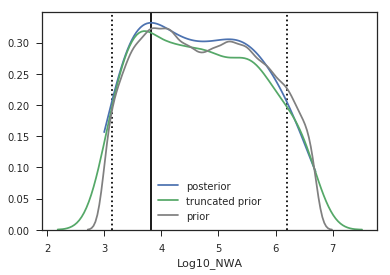

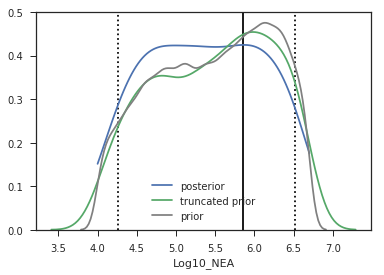

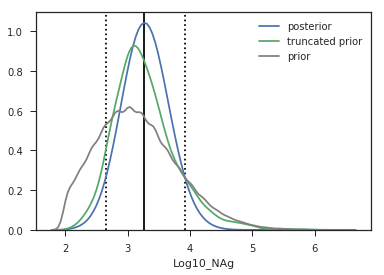

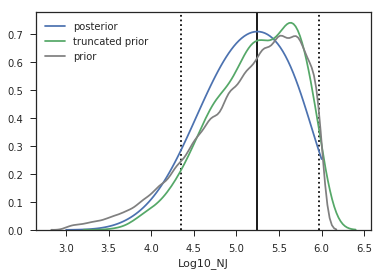

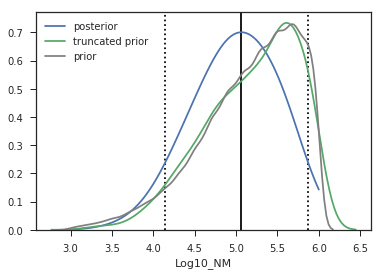

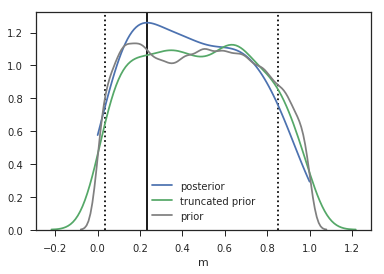

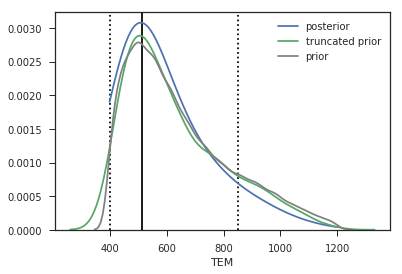

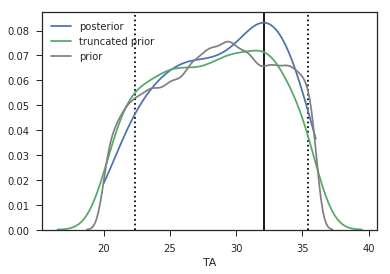

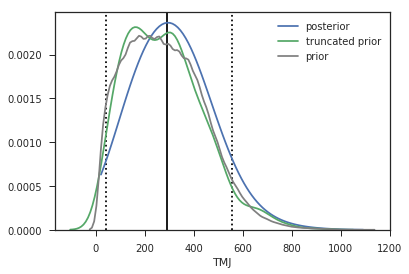

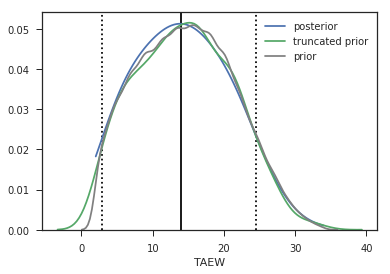

In [20]:
for param in params:
    plot_param_densities(posterior_pls, truncated_pls, prior_pls, df_chrs_reformat_pls, param)

#### Joint density plot

Create joint density dataframe

In [21]:
joint_NEA_NWA_df_pls = create_joint_df(jointPosterior_name)
joint_NEA_NWA_df_pls.head()

,number,Log10_NWA,Log10_NEA,density,HDI
0,0,3.00000,4.0,2.59815,0.998374
1,1,3.03737,4.0,2.80692,0.997747
2,2,3.07475,4.0,3.01398,0.996990
3,3,3.11212,4.0,3.21730,0.996045
4,4,3.14949,4.0,3.41492,0.994625


In [22]:
prob = get_prob_NEA_grtr_NWA(joint_NEA_NWA_df_pls)
print(prob)

0.6853670312473815


/vol_c/src/ABC_results_AJ/functions/assessment_functions.py:246: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  Z = z.reshape(len(NEA), len(NWA))


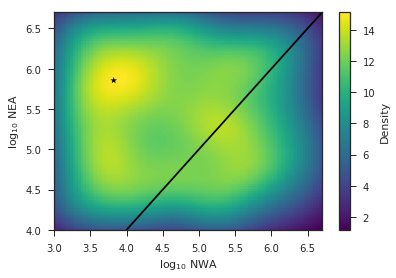

In [23]:
plot_joint_mtpltlb(joint_NEA_NWA_df_pls, df_chrs_reformat_pls)

# Chr 3

In [1]:
%%bash
ls /vol_c/ABC_AJmodels_update/*chr3*pdf

/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr3_params.pdf
/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr3_pca.pdf
/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr3_stats.pdf
/vol_c/ABC_AJmodels_update/RMSE_input_ABC_OSG_CHTC_HPC_chr3.txt.pdf


## PLS Reduced Params

In [7]:
path = '/vol_c/ABC_AJmodels_update'
os.chdir(path)
abc_config_name = "test_ABC_estimate_PLS.txt"

[simName, obsName, outputPrefix, params_str] = read_abc_config(abc_config_name)
print(simName)

[BestSimsParamStats_name,
 MarginalPosteriorDensities_name,
 MarginalPosteriorCharacteristics_name,
 jointPosterior_name,
 MarginalPosteriorCharacteristics_reformat_name,
modelFit] = get_results_files(outputPrefix)
jointPosterior_name = '{}model0_jointPosterior_1_2_Obs0.txt'.format(outputPrefix)
print(BestSimsParamStats_name)
print(MarginalPosteriorDensities_name)
print(jointPosterior_name)
print(MarginalPosteriorCharacteristics_reformat_name)

test_ABC_estimate_PLS.txt
input_ABC_OSG_CHTC_HPC_chr3_transformed_10pls.txt
ABC_M2_genome_estimate_134718_10pls_1000ret_chr3_model0_BestSimsParamStats_Obs0.txt
ABC_M2_genome_estimate_134718_10pls_1000ret_chr3_model0_MarginalPosteriorDensities_Obs0.txt
ABC_M2_genome_estimate_134718_10pls_1000ret_chr3_model0_jointPosterior_1_2_Obs0.txt
ABC_M2_genome_estimate_134718_10pls_1000ret_chr3_model0_MarginalPosteriorCharacteristicsReformat.txt


In [8]:
params_str
ranges = params_str.split(',')
print(ranges)
param_indexes = []
for values in ranges:
    if '-' in values:
        x = int(values.split('-')[0].strip()) - 1
        y = int(values.split('-')[1].strip())
        param_indexes.extend(list(range(x, y)))
    else:
        param_indexes.append(int(values) -1 )
print(param_indexes)

['2-12']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


#### Reformat marginal posterior densities charecterisitcs file

In [9]:
df_chrs_reformat_pls = reformat_Characteristics(MarginalPosteriorCharacteristics_name)
df_chrs_reformat_pls

parsing ABC_M2_genome_estimate_134718_10pls_1000ret_chr3_model0_MarginalPosteriorCharacteristics.txt


/vol_c/src/ABC_results_AJ/functions/assessment_functions.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_param['param'] = param


,mode,mean,median,q50_lower,q50_upper,q90_lower,q90_upper,q95_lower,q95_upper,q99_lower,q99_upper,HDI50_lower,HDI50_upper,HDI90_lower,HDI90_upper,HDI95_lower,HDI95_upper,HDI99_lower,HDI99_upper,param
0,3.747470,4.570850,4.480250,3.779560,5.321950,3.218050,6.192090,3.120360,6.385090,3.02685,6.615670,3.284770,4.700500,3.056060,5.968740,3.000000,6.192090,3.000000e+00,6.546330,Log10_NWA
0,4.872730,5.335660,5.308120,4.745460,5.946800,4.224910,6.461490,4.126610,6.559650,4.02887,6.665610,4.450000,5.629620,4.231980,6.468180,4.117230,6.550000,4.013640e+00,6.648680,Log10_NEA
0,3.264340,3.279850,3.277940,3.113880,3.443960,2.881790,3.684700,2.807020,3.762090,2.66205,3.914090,3.100190,3.429910,2.888050,3.690910,2.806160,3.761050,2.659930e+00,3.911560,Log10_NAg
0,5.212120,5.114370,5.144360,4.772700,5.491790,4.251180,5.851490,4.084870,5.918030,3.76489,5.981660,4.863640,5.576560,4.409090,5.960710,4.229770,5.984850,3.893980e+00,6.000000,Log10_NJ
0,4.272730,4.306340,4.299780,3.983740,4.623050,3.533410,5.097730,3.393580,5.251940,3.16257,5.543980,3.981970,4.621210,3.530300,5.094310,3.378790,5.235710,3.126340e+00,5.500000,Log10_NM
0,0.262627,0.480681,0.477342,0.262652,0.692954,0.076914,0.903108,0.043347,0.943613,0.00993,0.986396,0.207071,0.635149,0.059069,0.883838,0.025704,0.924242,8.852980e-07,0.974258,m
0,521.212000,612.066000,581.343000,498.270000,693.560000,424.374000,924.595000,412.825000,994.250000,402.70500,1105.960000,440.213000,614.141000,400.000000,835.725000,400.000000,924.595000,4.000000e+02,1065.150000,TEM
0,31.313100,28.782000,29.076400,25.615900,32.070600,21.906900,34.817000,21.130000,35.330100,20.28260,35.845800,27.415500,33.656600,22.646700,35.434300,21.697000,35.775100,2.040980e+01,35.919200,TA
0,309.351000,326.042000,321.622000,222.702000,423.760000,97.638700,571.056000,67.450500,618.941000,32.72580,712.679000,214.891000,415.682000,82.470000,552.958000,45.857800,589.875000,2.100000e+01,674.692000,TMJ
0,14.282800,15.121400,14.902600,10.241400,19.733200,4.720350,26.461000,3.565260,28.452000,2.36833,31.622500,9.814140,19.292900,3.777780,25.282300,2.484850,26.908700,2.000000e+00,30.472200,TAEW


In [10]:
prior_pls = pd.read_csv(simName, sep = '\t')
prior_pls.head()

,daf,Log10_NWA,Log10_NEA,Log10_NAg,Log10_NJ,Log10_NM,m,TEM,TA,TMJ,...,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9,LinearCombination_10
0,0.064757,4.30807,5.22727,3.30942,5.66667,4.00000,0.363637,650.505,31.9596,64.2691,...,-3.56704,3.151440,0.767700,-0.194892,2.325610,-0.720878,3.196380,-1.078060,-0.654791,-0.717433
1,0.066644,4.38283,6.61818,3.12872,5.15152,5.18182,0.191920,812.121,30.0202,269.7970,...,-4.36414,-0.737707,-1.051450,-1.557070,-1.529520,-0.168337,-0.764272,-0.704697,-0.366737,2.459570
2,0.056356,5.80302,4.87273,3.21906,5.27273,4.96970,0.141415,602.020,25.4949,204.8940,...,-6.94148,-4.305100,-0.753041,-2.890320,-2.536620,-1.835040,-0.897369,0.149916,1.347420,3.535210
3,0.084422,5.76565,6.53636,2.94841,3.75755,3.96970,0.636364,674.747,31.9596,323.8840,...,8.89743,1.066620,2.971530,-2.395080,-5.518200,2.241640,-1.434040,-1.089570,3.954340,-2.801410
4,0.090326,3.26174,5.66364,3.17406,5.39394,4.96970,0.656566,634.343,30.0202,302.2490,...,-3.94705,-0.291350,-1.095270,2.473080,0.864997,-0.664235,-2.456980,1.126290,-0.328578,-3.142600


In [11]:
# param_indexes = get_param_indexes(params_str)
print(param_indexes)
params = get_col_names(param_indexes, prior_pls)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [12]:
truncated_pls = pd.read_csv(BestSimsParamStats_name, sep = '\t')
truncated_pls.head()

,Sim_num,Dist,Log10_NWA,Log10_NEA,Log10_NAg,Log10_NJ,Log10_NM,m,TEM,TA,...,LinearCombination_0,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9
0,112,28.4600,4.75656,5.96364,3.85138,4.21211,3.78789,0.202021,707.071,25.9798,...,-9.04142,-2.67029,3.50841,-0.141748,3.85750,2.437360,4.245020,-0.323303,0.582920,0.022876
1,162,27.3335,4.15857,4.60000,3.21906,5.48485,4.36363,0.212122,779.798,22.7475,...,-7.99382,-1.31619,3.41911,-0.519858,2.58073,0.936043,0.589417,-1.347230,-0.238193,-0.459894
2,334,26.7182,3.74749,6.34545,3.94166,4.27272,4.96970,0.707071,626.263,33.8990,...,-12.01780,-4.15970,2.13622,-1.362330,3.08523,2.309590,0.418785,-0.925338,3.022550,-0.313441
3,414,23.6855,4.15857,5.93636,3.30942,5.42424,5.30303,0.656566,666.667,33.7374,...,-8.58694,-2.87371,3.48251,-0.025625,3.60585,2.362310,-1.332700,-0.015570,1.601150,0.327737
4,519,26.6178,6.51312,6.45455,3.03862,4.96970,5.09091,0.454546,602.020,34.0606,...,-9.70326,-2.98475,1.39720,1.401170,2.00098,2.085220,-1.429110,-1.816560,1.022580,-0.520296


In [13]:
posterior_pls = pd.read_csv(MarginalPosteriorDensities_name, sep = '\t')
posterior_pls.head()

,number,Log10_NWA,Log10_NWA.density,Log10_NEA,Log10_NEA.density,Log10_NAg,Log10_NAg.density,Log10_NJ,Log10_NJ.density,Log10_NM,...,TEM,TEM.density,TA,TA.density,TMJ,TMJ.density,TAEW,TAEW.density,Tm,Tm.density
0,1,3.00000,0.181251,4.00000,0.166052,2.00000,6.513910e-07,3.00000,0.000165,3.00000,...,400.000,0.001849,20.0000,0.016314,21.0000,0.000394,2.00000,0.012881,3.00000,0.006883
1,2,3.03737,0.197667,4.02727,0.179522,2.03010,1.319810e-06,3.03030,0.000216,3.03030,...,408.081,0.001985,20.1616,0.017913,30.9431,0.000450,2.32323,0.014117,3.32323,0.007666
2,3,3.07475,0.214268,4.05455,0.193155,2.06021,2.625250e-06,3.06061,0.000280,3.06061,...,416.162,0.002118,20.3232,0.019558,40.8863,0.000512,2.64646,0.015393,3.64646,0.008495
3,4,3.11212,0.230896,4.08182,0.206890,2.09031,5.127420e-06,3.09091,0.000362,3.09091,...,424.242,0.002247,20.4848,0.021238,50.8294,0.000579,2.96970,0.016703,3.96970,0.009370
4,5,3.14949,0.247391,4.10909,0.220673,2.12041,9.835040e-06,3.12121,0.000464,3.12121,...,432.323,0.002370,20.6465,0.022944,60.7725,0.000651,3.29293,0.018042,4.29293,0.010288


TypeError: cannot convert the series to <class 'float'>

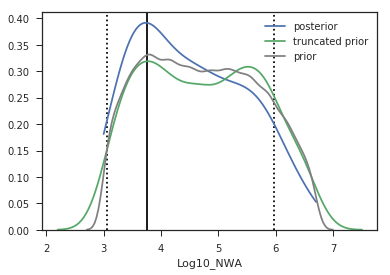

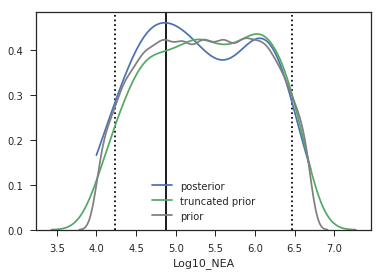

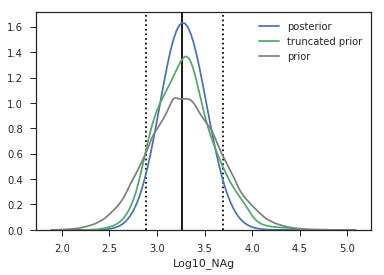

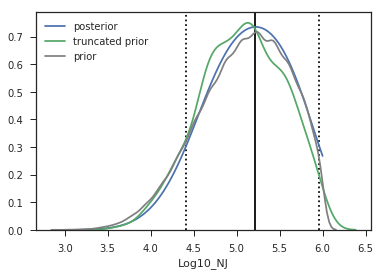

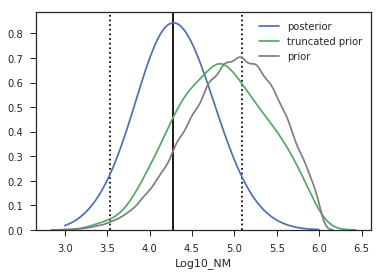

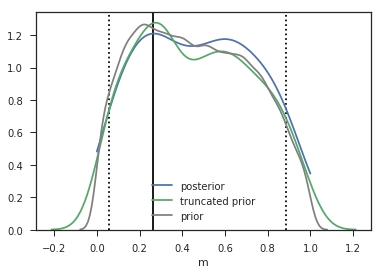

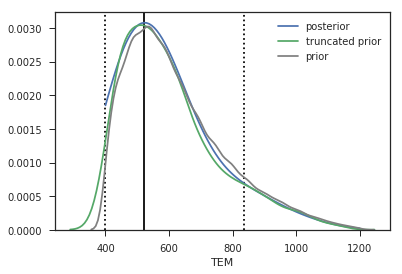

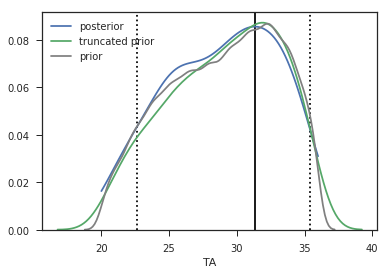

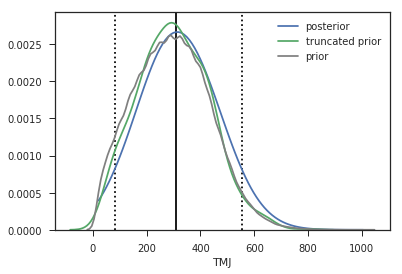

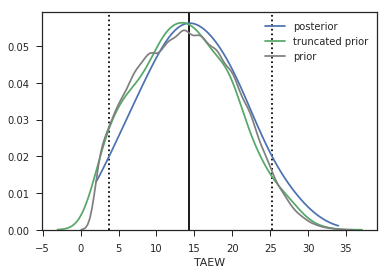

In [14]:
for param in params:
    plot_param_densities(posterior_pls, truncated_pls, prior_pls, df_chrs_reformat_pls, param)

#### Joint density plot

Create joint density dataframe

In [15]:
joint_NEA_NWA_df_pls = create_joint_df(jointPosterior_name)
joint_NEA_NWA_df_pls.head()

,number,Log10_NWA,Log10_NEA,density,HDI
0,0,3.00000,4.0,2.40488,0.994522
1,1,3.03737,4.0,2.67235,0.992047
2,2,3.07475,4.0,2.95068,0.988554
3,3,3.11212,4.0,3.23777,0.984733
4,4,3.14949,4.0,3.53126,0.980280


In [16]:
prob = get_prob_NEA_grtr_NWA(joint_NEA_NWA_df_pls)
print(prob)

0.7261614272071181


/vol_c/src/ABC_results_AJ/functions/assessment_functions.py:246: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  Z = z.reshape(len(NEA), len(NWA))


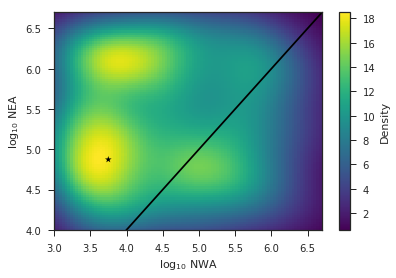

In [17]:
plot_joint_mtpltlb(joint_NEA_NWA_df_pls, df_chrs_reformat_pls)

# Chr 4

In [3]:
%%bash
ls /vol_c/ABC_AJmodels_update/*chr4*pdf

/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr4_params.pdf
/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr4_pca.pdf
/vol_c/ABC_AJmodels_update/input_ABC_OSG_CHTC_HPC_chr4_stats.pdf
/vol_c/ABC_AJmodels_update/RMSE_input_ABC_OSG_CHTC_HPC_chr4.txt.pdf


## PLS Reduced Params

In [4]:
path = '/vol_c/ABC_AJmodels_update'
os.chdir(path)
abc_config_name = "test_ABC_estimate_PLS.txt"

[simName, obsName, outputPrefix, params_str] = read_abc_config(abc_config_name)
print(simName)

[BestSimsParamStats_name,
 MarginalPosteriorDensities_name,
 MarginalPosteriorCharacteristics_name,
 jointPosterior_name,
 MarginalPosteriorCharacteristics_reformat_name,
modelFit] = get_results_files(outputPrefix)
jointPosterior_name = '{}model0_jointPosterior_1_2_Obs0.txt'.format(outputPrefix)
print(BestSimsParamStats_name)
print(MarginalPosteriorDensities_name)
print(jointPosterior_name)
print(MarginalPosteriorCharacteristics_reformat_name)

test_ABC_estimate_PLS.txt
input_ABC_OSG_CHTC_HPC_chr4_transformed_10pls.txt
ABC_M2_genome_estimate_150681_10pls_1000ret_chr4_model0_BestSimsParamStats_Obs0.txt
ABC_M2_genome_estimate_150681_10pls_1000ret_chr4_model0_MarginalPosteriorDensities_Obs0.txt
ABC_M2_genome_estimate_150681_10pls_1000ret_chr4_model0_jointPosterior_1_2_Obs0.txt
ABC_M2_genome_estimate_150681_10pls_1000ret_chr4_model0_MarginalPosteriorCharacteristicsReformat.txt


In [5]:
params_str
ranges = params_str.split(',')
print(ranges)
param_indexes = []
for values in ranges:
    if '-' in values:
        x = int(values.split('-')[0].strip()) - 1
        y = int(values.split('-')[1].strip())
        param_indexes.extend(list(range(x, y)))
    else:
        param_indexes.append(int(values) -1 )
print(param_indexes)

['2-12']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


#### Reformat marginal posterior densities charecterisitcs file

In [6]:
df_chrs_reformat_pls = reformat_Characteristics(MarginalPosteriorCharacteristics_name)
df_chrs_reformat_pls

parsing ABC_M2_genome_estimate_150681_10pls_1000ret_chr4_model0_MarginalPosteriorCharacteristics.txt


/vol_c/src/ABC_results_AJ/functions/assessment_functions.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_param['param'] = param


,mode,mean,median,q50_lower,q50_upper,q90_lower,q90_upper,q95_lower,q95_upper,q99_lower,q99_upper,HDI50_lower,HDI50_upper,HDI90_lower,HDI90_upper,HDI95_lower,HDI95_upper,HDI99_lower,HDI99_upper,param
0,3.859590,4.582060,4.521680,3.823230,5.288600,3.228030,6.168330,3.125760,6.371050,3.027980,6.611240,3.467170,4.885430,3.056060,5.929780,3.000000,6.168330,3.000000e+00,6.538820,Log10_NWA
0,4.900000,5.322990,5.293900,4.756860,5.896820,4.246420,6.440560,4.144110,6.547520,4.034900,6.662720,4.531820,5.654890,4.231820,6.425780,4.146610,6.550000,4.031510e+00,6.659090,Log10_NEA
0,3.200730,3.191170,3.191450,3.059410,3.323090,2.869460,3.511880,2.808270,3.573120,2.689990,3.692130,3.058340,3.321960,2.876080,3.518370,2.817370,3.582070,2.691520e+00,3.693630,Log10_NAg
0,5.363640,5.203080,5.244640,4.886640,5.562160,4.357630,5.880460,4.193120,5.935740,3.882280,5.985940,5.015150,5.675470,4.536190,5.984850,4.357630,6.000000,4.006830e+00,6.000000,Log10_NJ
0,4.545450,4.562510,4.560710,4.336230,4.786900,4.017080,5.114450,3.915010,5.220420,3.720460,5.424570,4.322210,4.772730,4.015150,5.112240,3.922130,5.227270,3.712120e+00,5.415380,Log10_NM
0,0.313132,0.459002,0.448054,0.254056,0.657541,0.074057,0.879702,0.041484,0.926611,0.009434,0.980775,0.186869,0.585201,0.045455,0.846082,0.015152,0.893565,8.852980e-07,0.964564,m
0,529.293000,602.195000,578.605000,497.741000,681.374000,424.472000,876.650000,412.902000,942.203000,402.728000,1057.740000,444.956000,614.141000,400.000000,798.353000,400.000000,876.650000,4.000000e+02,1012.620000,TEM
0,27.272700,28.519200,28.540000,25.488500,31.663200,22.138500,34.620800,21.332100,35.196200,20.356700,35.806100,25.414100,31.588500,22.523900,34.949500,21.813700,35.596000,2.065090e+01,36.000000,TA
0,271.486000,276.780000,272.848000,182.863000,364.318000,75.878500,496.184000,52.846400,539.309000,28.532800,622.361000,180.793000,362.102000,59.416300,474.467000,25.949500,500.379000,2.100000e+01,589.050000,TMJ
0,15.575800,15.204400,15.151700,10.261600,19.977400,4.661460,26.144200,3.524840,27.989800,2.356420,31.234500,10.242400,19.958100,3.777780,25.125000,2.484850,26.566200,2.000000e+00,30.006200,TAEW


In [7]:
prior_pls = pd.read_csv(simName, sep = '\t')
prior_pls.head()

,daf,Log10_NWA,Log10_NEA,Log10_NAg,Log10_NJ,Log10_NM,m,TEM,TA,TMJ,...,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9,LinearCombination_10
0,0.061728,5.50403,5.11818,2.99344,5.60606,4.54546,0.040405,755.556,24.3636,687.1900,...,-5.51121,-1.062730,-1.607300,1.880200,3.30165,0.037907,-1.622850,2.017400,-3.158280,-0.694974
1,0.090176,6.62524,6.48182,3.38471,5.54545,3.84850,0.121213,480.808,32.6061,388.8960,...,4.59585,5.577120,-1.265050,1.819700,1.49319,2.140270,1.297580,-1.061330,0.639741,0.363854
2,0.051617,6.40100,6.45455,3.44498,4.78788,4.21211,0.818182,602.020,21.2929,30.9431,...,2.65427,-0.373802,-0.787505,-2.490750,2.19647,-0.570445,0.924621,-0.755506,1.715860,1.940860
3,0.076900,6.47575,6.48182,3.56538,4.84848,3.63639,0.666667,739.394,28.0808,438.6120,...,-2.63459,4.473270,0.466534,2.024240,2.25805,4.104870,0.068978,1.921410,0.141850,-0.750550
4,0.069860,6.40100,5.03636,3.53529,4.81818,3.81816,0.161617,488.889,23.5556,378.9530,...,-7.24242,-1.135220,0.298097,0.048666,-1.25111,2.538420,-1.576420,-1.279330,0.516643,-0.006742


In [8]:
# param_indexes = get_param_indexes(params_str)
print(param_indexes)
params = get_col_names(param_indexes, prior_pls)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [9]:
truncated_pls = pd.read_csv(BestSimsParamStats_name, sep = '\t')
truncated_pls.head()

,Sim_num,Dist,Log10_NWA,Log10_NEA,Log10_NAg,Log10_NJ,Log10_NM,m,TEM,TA,...,LinearCombination_0,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9
0,77,17.2972,5.05555,4.62727,2.96332,4.84848,4.84848,0.797980,690.909,33.0909,...,10.59390,2.476190,3.335820,4.13861,-1.41691,-2.52676,-2.010350,-1.70899,-0.335631,1.42596
1,136,24.0611,3.89697,4.68182,3.02366,5.15152,4.72727,0.313132,892.929,33.4141,...,8.68026,-0.124301,0.993345,2.22747,-1.48263,-1.61172,-2.308110,-0.13772,1.245710,1.64031
2,392,25.0695,4.98080,6.70000,3.17406,5.54545,4.87879,0.676768,577.778,29.3737,...,10.18890,-2.667630,4.415860,2.70944,-2.96536,-1.69114,-2.570870,-1.27207,-2.236220,1.77574
3,469,23.8541,3.52323,6.40000,3.50515,4.75758,4.15152,0.585859,1070.710,25.0101,...,10.72170,-2.892010,2.060310,2.23947,-1.79345,-2.68539,0.049841,-2.05483,-1.115690,2.78618
4,935,13.2880,3.37383,5.58182,3.47509,5.09091,4.09089,0.323233,488.889,31.7980,...,12.09030,-0.226815,-0.822666,3.84084,-2.92317,-3.11690,-0.053488,-2.66284,-0.730003,1.03773


In [10]:
posterior_pls = pd.read_csv(MarginalPosteriorDensities_name, sep = '\t')
posterior_pls.head()

,number,Log10_NWA,Log10_NWA.density,Log10_NEA,Log10_NEA.density,Log10_NAg,Log10_NAg.density,Log10_NJ,Log10_NJ.density,Log10_NM,...,TEM,TEM.density,TA,TA.density,TMJ,TMJ.density,TAEW,TAEW.density,Tm,Tm.density
0,1,3.00000,0.173650,4.00000,0.134666,2.14922,6.095540e-07,3.00000,0.000047,3.00000,...,400.000,0.001833,20.0000,0.012523,21.0000,0.000629,2.00000,0.013335,3.00000,0.006527
1,2,3.03737,0.188772,4.02727,0.148781,2.17113,1.177690e-06,3.03030,0.000063,3.03030,...,408.081,0.001973,20.1616,0.013865,29.6375,0.000710,2.32323,0.014604,3.32323,0.007291
2,3,3.07475,0.203922,4.05455,0.163442,2.19303,2.238710e-06,3.06061,0.000085,3.06061,...,416.162,0.002111,20.3232,0.015284,38.2749,0.000797,2.64646,0.015907,3.64646,0.008102
3,4,3.11212,0.218954,4.08182,0.178560,2.21494,4.187540e-06,3.09091,0.000113,3.09091,...,424.242,0.002245,20.4848,0.016780,46.9124,0.000888,2.96970,0.017237,3.96970,0.008959
4,5,3.14949,0.233728,4.10909,0.194042,2.23685,7.708400e-06,3.12121,0.000150,3.12121,...,432.323,0.002373,20.6465,0.018354,55.5499,0.000984,3.29293,0.018589,4.29293,0.009859


TypeError: cannot convert the series to <class 'float'>

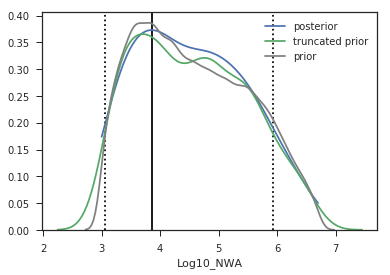

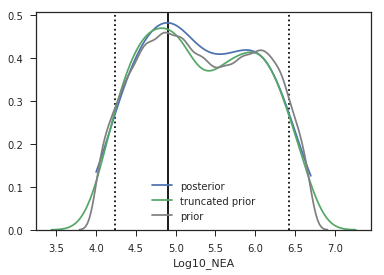

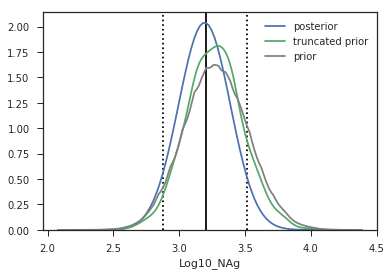

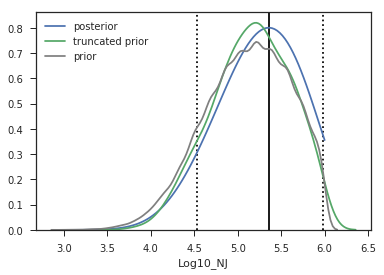

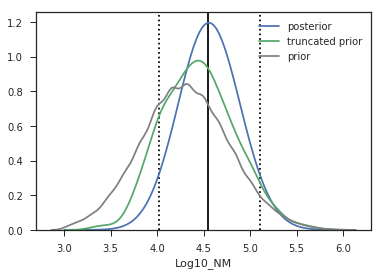

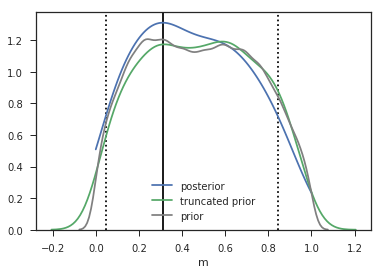

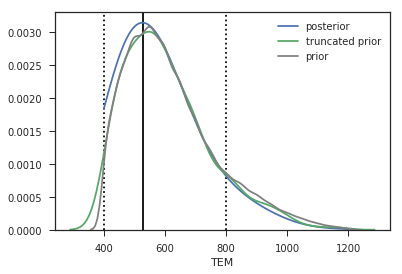

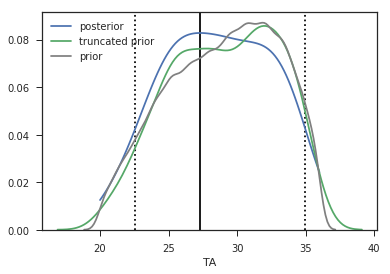

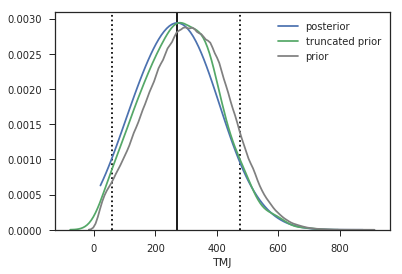

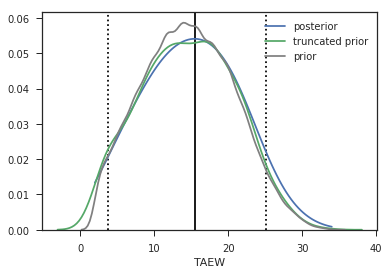

In [11]:
for param in params:
    plot_param_densities(posterior_pls, truncated_pls, prior_pls, df_chrs_reformat_pls, param)

#### Joint density plot

Create joint density dataframe

In [12]:
joint_NEA_NWA_df_pls = create_joint_df(jointPosterior_name)
joint_NEA_NWA_df_pls.head()

,number,Log10_NWA,Log10_NEA,density,HDI
0,0,3.00000,4.0,2.18361,0.994514
1,1,3.03737,4.0,2.36696,0.992369
2,2,3.07475,4.0,2.54869,0.989925
3,3,3.11212,4.0,2.72667,0.987362
4,4,3.14949,4.0,2.89882,0.984683


In [13]:
prob = get_prob_NEA_grtr_NWA(joint_NEA_NWA_df_pls)
print(prob)

0.7231024196397535


/vol_c/src/ABC_results_AJ/functions/assessment_functions.py:246: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  Z = z.reshape(len(NEA), len(NWA))


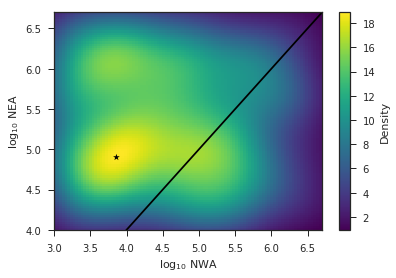

In [14]:
plot_joint_mtpltlb(joint_NEA_NWA_df_pls, df_chrs_reformat_pls)